# We Rate Dogs 

## Introduction

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from PIL import Image
from io import BytesIO
import numpy as np
import requests
import tweepy
import json
from PIL import Image
from io import BytesIO

pd.set_option('float_format', '{:f}'.format)

### Gathering

In [6]:
archive = pd.read_csv('twitter_archive_enhanced.csv')
archive.shape

(2356, 17)

In [7]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
print(response.status_code)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

predict = pd.read_csv('image_predictions.tsv', sep='\t')
predict.shape

200


(2075, 12)

In [8]:
consumer_key = "9LYMdjBau8ZcLZwCDWP3LtTeB"
consumer_secret = "pZw3HiDmpeFoUCDJWmd4Yq9fxhSpUqv9FaELiK06Gnt1xm9m2u"
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = predict.tweet_id.values
len(tweet_ids)

2075

In [ ]:
%%time

# Query Twitter's API for JSON data 
count = 0
fails_dict = {}

with open('tweet_json.txt', 'w') as outfile:
  for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            print("Success")
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
        

print(fails_dict)

1: 666020888022790149
Success
2: 666029285002620928
Success
3: 666033412701032449
Success
4: 666044226329800704
Success
5: 666049248165822465
Success
6: 666050758794694657
Success
7: 666051853826850816
Success
8: 666055525042405380
Success
9: 666057090499244032
Success
10: 666058600524156928
Success
11: 666063827256086533
Success
12: 666071193221509120
Success
13: 666073100786774016
Success
14: 666082916733198337
Success
15: 666094000022159362
Success
16: 666099513787052032
Success
17: 666102155909144576
Success
18: 666104133288665088
Success
19: 666268910803644416
Success
20: 666273097616637952
Success
21: 666287406224695296
Success
22: 666293911632134144
Success
23: 666337882303524864
Success
24: 666345417576210432
Success
25: 666353288456101888
Success
26: 666362758909284353
Success
27: 666373753744588802
Success
28: 666396247373291520
Success
29: 666407126856765440
Success
30: 666411507551481857
Success
31: 666418789513326592
Success
32: 666421158376562688
Success
33: 6664282763494

Success
261: 670783437142401025
Success
262: 670786190031921152
Success
263: 670789397210615808
Success
264: 670792680469889025
Success
265: 670797304698376195
Success
266: 670803562457407488
Success
267: 670804601705242624
Success
268: 670807719151067136
Success
269: 670811965569282048
Success
270: 670815497391357952
Success
271: 670822709593571328
Success
272: 670823764196741120
Success
273: 670826280409919488
Success
274: 670832455012716544
Success
275: 670833812859932673
Success
276: 670838202509447168
Success
277: 670840546554966016
Success
278: 670842764863651840
Success
279: 670995969505435648
Success
280: 671109016219725825
Success
281: 671115716440031232
Success
282: 671122204919246848
Success
283: 671134062904504320
Success
284: 671138694582165504
Success
285: 671141549288370177
Success
286: 671147085991960577
Success
287: 671151324042559489
Success
288: 671154572044468225
Success
289: 671159727754231808
Success
290: 671163268581498880
Success
291: 671166507850801152
Success


Success
518: 676440007570247681
Success
519: 676470639084101634
Success
520: 676496375194980353
Success
521: 676533798876651520
Success
522: 676575501977128964
Success
523: 676582956622721024
Success
524: 676588346097852417
Success
525: 676603393314578432
Success
526: 676606785097199616
Success
527: 676613908052996102
Success
528: 676617503762681856
Success
529: 676776431406465024
Success
530: 676811746707918848
Success
531: 676819651066732545
Success
532: 676821958043033607
Success
533: 676864501615042560
Success
534: 676897532954456065
Success
535: 676936541936185344
Success
536: 676942428000112642
Success
537: 676946864479084545
Success
538: 676948236477857792
Success
539: 676949632774234114
Success
540: 676957860086095872
Success
541: 676975532580409345
Success
542: 677187300187611136
Success
543: 677228873407442944
Success
544: 677269281705472000
Success
545: 677301033169788928
Success
546: 677314812125323265
Success
547: 677328882937298944
Success
548: 677331501395156992
Success


Success
775: 689623661272240129
Success
776: 689659372465688576
Success
777: 689661964914655233
Success
778: 689835978131935233
Success
779: 689877686181715968
Success
780: 689905486972461056
Success
781: 689977555533848577
Success
782: 689999384604450816
Success
783: 690005060500217858
Success
784: 690015576308211712
Success
785: 690021994562220032
Success
786: 690248561355657216
Success
787: 690360449368465409
Success
788: 690374419777196032
Success
789: 690400367696297985
Success
790: 690597161306841088
Success
791: 690649993829576704
Success
792: 690690673629138944
Success
793: 690728923253055490
Success
794: 690735892932222976
Success
795: 690932576555528194
Success
796: 690938899477221376
Success
797: 690959652130045952
Success
798: 691090071332753408
Success
799: 691096613310316544
Success
800: 691321916024623104
Success
801: 691416866452082688
Success
802: 691444869282295808
Success
803: 691459709405118465
Success
804: 691483041324204033
Success
805: 691675652215414786
Success


Rate limit reached. Sleeping for: 524


Success
902: 700002074055016451
Success
903: 700029284593901568
Success
904: 700062718104104960
Success
905: 700143752053182464
Success
906: 700151421916807169
Success
907: 700167517596164096
Success
908: 700462010979500032
Success
909: 700505138482569216
Success
910: 700518061187723268
Success
911: 700747788515020802
Success
912: 700796979434098688
Success
913: 700847567345688576
Success
914: 700864154249383937
Success
915: 700890391244103680
Success
916: 701214700881756160
Success
917: 701545186879471618
Success
918: 701570477911896070
Success
919: 701601587219795968
Success
920: 701889187134500865
Success
921: 701952816642965504
Success
922: 701981390485725185
Success
923: 702217446468493312
Success
924: 702276748847800320
Success
925: 702321140488925184
Success
926: 702539513671897089
Success
927: 702598099714314240
Success
928: 702671118226825216
Success
929: 702684942141153280
Success
930: 702932127499816960
Success
931: 703041949650034688
Success
932: 703079050210877440
Success


Success
1154: 732726085725589504
Success
1155: 732732193018155009
Success
1156: 733109485275860992
Success
1157: 733460102733135873
Success
1158: 733482008106668032
Success
1159: 733822306246479872
Success
1160: 733828123016450049
Success
1161: 734776360183431168
Success
1162: 734787690684657664
Success
1163: 734912297295085568
Success
1164: 735137028879360001
Success
1165: 735256018284875776
Success
1166: 735274964362878976
Success
1167: 735635087207878657
Success
1168: 735648611367784448
Success
1169: 735991953473572864
Success
1170: 736010884653420544
Success
1171: 736225175608430592
Success
1172: 736365877722001409
Success
1173: 736736130620620800
Success
1174: 737310737551491075
Success
1175: 737322739594330112
Success
1176: 737445876994609152
Success
1177: 737678689543020544
Success
1178: 737800304142471168
Success
1179: 737826014890496000
Success
1180: 738156290900254721
Success
1181: 738166403467907072
Success
1182: 738184450748633089
Success
1183: 738402415918125056
Success
11

Success
1403: 768970937022709760
Success
1404: 769212283578875904
Success
1405: 769695466921623552
Success
1406: 769940425801170949
Success
1407: 770069151037685760
Success
1408: 770093767776997377
Success
1409: 770293558247038976
Success
1410: 770414278348247044
Success
1411: 770655142660169732
Success
1412: 770772759874076672
Success
1413: 770787852854652928
Success
1414: 771004394259247104
Fail
1415: 771014301343748096
Success
1416: 771102124360998913
Success
1417: 771136648247640064
Success
1418: 771171053431250945
Success
1419: 771380798096281600
Success
1420: 771500966810099713
Success
1421: 771770456517009408
Success
1422: 772102971039580160
Success
1423: 772114945936949249
Success
1424: 772117678702071809
Success
1425: 772152991789019136
Success
1426: 772193107915964416
Success
1427: 772581559778025472
Success
1428: 772615324260794368
Success
1429: 772826264096874500
Success
1430: 772877495989305348
Success
1431: 773191612633579521
Success
1432: 773247561583001600
Success
1433:

Success
1652: 809448704142938112
Success
1653: 809808892968534016
Success
1654: 809920764300447744
Success
1655: 810254108431155201
Success
1656: 810284430598270976
Success
1657: 810657578271330305
Success
1658: 810896069567610880
Success
1659: 810984652412424192
Success
1660: 811386762094317568
Success
1661: 811627233043480576
Success
1662: 811744202451197953
Success
1663: 811985624773361665
Success
1664: 812372279581671427
Success
1665: 812466873996607488
Success
1666: 812503143955202048
Success
1667: 812709060537683968
Success
1668: 812781120811126785
Success
1669: 813051746834595840
Success
1670: 813066809284972545
Success
1671: 813081950185472002
Success
1672: 813096984823349248
Success
1673: 813112105746448384
Success
1674: 813127251579564032
Success
1675: 813142292504645637
Success
1676: 813157409116065792
Success
1677: 813172488309972993
Success
1678: 813187593374461952
Success
1679: 813202720496779264
Success
1680: 813217897535406080
Success
1681: 813800681631023104
Success
16

In [4]:
json = pd.read_json('tweet_json.txt', lines=True)

In [5]:
json["tweet_id"]=json["id"]

In [6]:
json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,tweet_id
0,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,416,2234,False,False,False,False,en,NaN,666020888022790149
1,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,39,111,False,False,False,False,en,NaN,666029285002620928
2,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,35,98,False,False,False,False,en,NaN,666033412701032449
3,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,113,244,False,False,False,False,en,NaN,666044226329800704
4,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,36,86,False,False,False,False,en,NaN,666049248165822465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,7620,34385,False,False,False,False,en,NaN,891327558926688256
2052,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,7103,35974,False,False,False,False,en,NaN,891689557279858688
2053,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,3427,21435,False,False,False,False,en,NaN,891815181378084864
2054,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,5193,28505,False,False,False,False,en,NaN,892177421306343426


In [7]:
#Selecting columns 
twitter_api = json[['tweet_id','retweet_count', 'favorite_count']]

In [8]:
# Merging for Assesing
m1 = pd.merge(twitter_api,archive, on="tweet_id",how='left')
m2 = pd.merge(m1,predict, on="tweet_id",how='left')
df_final = m2

## Assesing 

In [9]:
pd.set_option("max_colwidth", 10)
pd.set_option('display.max_columns', 30)
df_final.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020...,416,2234,NaN,NaN,2015-1...,<a hre...,Here w...,NaN,NaN,NaN,https:...,8,10,None,None,None,None,None,https:...,1,Welsh_...,0.465074,True,collie,0.156665,True,Shetla...,0.061428,True
1,666029...,39,111,NaN,NaN,2015-1...,<a hre...,This i...,NaN,NaN,NaN,https:...,7,10,a,None,None,None,None,https:...,1,redbone,0.506826,True,miniat...,0.074192,True,Rhodes...,0.072010,True
2,666033...,35,98,NaN,NaN,2015-1...,<a hre...,Here i...,NaN,NaN,NaN,https:...,9,10,a,None,None,None,None,https:...,1,German...,0.596461,True,malinois,0.138584,True,bloodh...,0.116197,True
3,666044...,113,244,NaN,NaN,2015-1...,<a hre...,This i...,NaN,NaN,NaN,https:...,6,10,a,None,None,None,None,https:...,1,Rhodes...,0.408143,True,redbone,0.360687,True,miniat...,0.222752,True
4,666049...,36,86,NaN,NaN,2015-1...,<a hre...,Here w...,NaN,NaN,NaN,https:...,5,10,None,None,None,None,None,https:...,1,miniat...,0.560311,True,Rottwe...,0.243682,True,Doberman,0.154629,True


In [10]:
df_final.tail()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,891327...,7620,34385,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,12,10,Franklin,None,None,None,None,https:...,2,basset,0.555712,True,Englis...,0.225770,True,German...,0.175219,True
2052,891689...,7103,35974,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Darla,None,None,None,None,https:...,1,paper_...,0.170278,False,Labrad...,0.168086,True,spatula,0.040836,False
2053,891815...,3427,21435,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,12,10,Archie,None,None,None,None,https:...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2054,892177...,5193,28505,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Tilly,None,None,None,None,https:...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2055,892420...,6893,32964,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Phineas,None,None,None,None,https:...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   retweet_count               2056 non-null   int64  
 2   favorite_count              2056 non-null   int64  
 3   in_reply_to_status_id       23 non-null     float64
 4   in_reply_to_user_id         23 non-null     float64
 5   timestamp                   2056 non-null   object 
 6   source                      2056 non-null   object 
 7   text                        2056 non-null   object 
 8   retweeted_status_id         70 non-null     float64
 9   retweeted_status_user_id    70 non-null     float64
 10  retweeted_status_timestamp  70 non-null     object 
 11  expanded_urls               2056 non-null   object 
 12  rating_numerator            2056 non-null   int64  
 13  rating_denominator          2056 

In [12]:
df_final.describe()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,2056.00...,2056.00...,2056.00...,23.000000,23.000000,70.000000,70.000000,2056.00...,2056.00...,2056.00...,2056.00...,2056.00...,2056.00...
mean,7377003...,2324.19...,7265.58...,6978111...,4196983...,7592547...,1124945...,12.265078,10.516051,1.204280,0.594386,0.134767,0.060402
std,6751436...,4062.06...,10992.5...,4359383...,0.000000,5695445...,9411968...,40.867720,7.210005,0.563359,0.271242,0.100744,0.051003
min,6660208...,11.000000,0.000000,6671521...,4196983...,6675093...,783214....,0.000000,2.000000,1.000000,0.044333,0.000000,0.000000
25%,6762329...,494.750000,1385.25...,6732410...,4196983...,7086319...,4196983...,10.000000,10.000000,1.000000,0.363272,0.053894,0.016234
50%,7110025...,1094.00...,3183.00...,6757073...,4196983...,7755992...,4196983...,11.000000,10.000000,1.000000,0.587797,0.118635,0.049479
75%,7928012...,2673.25...,9028.75...,7031489...,4196983...,7947981...,4196983...,12.000000,10.000000,1.000000,0.844247,0.195667,0.092157
max,8924206...,69521.0...,142035....,8558181...,4196983...,8650134...,7874617...,1776.00...,170.000000,4.000000,1.000000,0.488014,0.273419


In [13]:
df_final.describe(include=[object])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,jpg_url,p1,p2,p3
count,2056,2056,2056,70,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056
unique,2056,3,2056,70,2056,934,2,2,2,2,1997,377,402,407
top,2015-1...,<a hre...,Here w...,2015-1...,https:...,None,None,None,None,None,https:...,golden...,Labrad...,Labrad...
freq,1,2016,1,1,1,570,1978,2048,1836,2032,2,150,104,79


In [14]:
#Cheking for nulls
df_final.isnull().values.sum()

10024

In [15]:
df_final.isnull().sum()

tweet_id                         0
retweet_count                    0
favorite_count                   0
in_reply_to_status_id         2033
in_reply_to_user_id           2033
timestamp                        0
source                           0
text                             0
retweeted_status_id           1986
retweeted_status_user_id      1986
retweeted_status_timestamp    1986
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf             

In [16]:
#Checking numerator rating
df_final.rating_numerator.value_counts().sort_index(ascending=True)

0         2
1         5
2         9
3        19
4        16
5        34
6        32
7        52
8        95
9       151
10      425
11      413
12      471
13      275
14       37
15        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [17]:
df_final.rating_numerator.describe()

count   2056.00...
mean     12.265078
std      40.867720
min       0.000000
25%      10.000000
50%      11.000000
75%      12.000000
max     1776.00...
Name: rating_numerator, dtype: float64

In [18]:
#Checking Denominator rating
df_final.rating_denominator.value_counts().sort_index(ascending=True)

2         1
7         1
10     2038
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [19]:
#Inspecting for duplicates
df_final.duplicated().sum()

0

In [20]:
pd.set_option("max_colwidth", 30)
#Inspecting dog breeds
df_final[['p1', 'p2', 'p3']].describe(include=['object'])

,p1,p2,p3
count,2056,2056,2056
unique,377,402,407
top,golden_retriever,Labrador_retriever,Labrador_retriever
freq,150,104,79


In [21]:
#Inspecting confidence levels
df_final[['p1_conf', 'p2_conf',
          'p3_conf']].describe().loc[['min', 'max', 'mean']].round(5)

,p1_conf,p2_conf,p3_conf
min,0.044330,0.000000,0.000000
max,1.000000,0.488010,0.273420
mean,0.594390,0.134770,0.060400


In [22]:
#Inspecting dog stages
df_final[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,1978.000000,2048.000000,1836.000000,2032.000000
doggo,78.000000,NaN,NaN,NaN
floofer,NaN,8.000000,NaN,NaN
pupper,NaN,NaN,220.000000,NaN
puppo,NaN,NaN,NaN,24.000000


In [23]:
#Inspecting Names
df_final.name.loc[50:60]

50      None
51         a
52     Carll
53    Klevin
54      None
55      Keet
56      None
57      Dave
58     Clybe
59      Gabe
60      None
Name: name, dtype: object

In [24]:
#Inspecting favorite and retweet count
df_final[['favorite_count', 'p1', 'p2', 'p3']].min()

favorite_count               0
p1                Afghan_hound
p2                Afghan_hound
p3                Afghan_hound
dtype: object

In [25]:
df_final[['retweet_count', 'p1', 'p2', 'p3']].max()

retweet_count          69521
p1                     zebra
p2               wood_rabbit
p3                     zebra
dtype: object

 ## Observations:
 Quality Issues:
 - Completeness: 10124 missing records.
 - Incorrect datatype in columns: `"tweet_id"`,`"timestamp"` 
 - The `"name"` column has accuracy issues
 - The `"in_reply_to_status_id"`, `"in_reply_to_user_id`` columns has missing values and we are not interest in replies.
 - The `"p1"`,`"p2"`,`"p3"` columns with validity and consistency issues
 - The `"p1_dog"`,`"p2_dog"`,`"p3_dog"` columns  with validity issues
 - We can observe that there are some 'None',objects present in `"doggo"`,`"floofer"`,`"pupper"` and`"puppo"` which have to be convert into 'NaN'

- The `"retweeted_status_id"`, `"retweeted_status_user_id"`,`"retweeted_status_timestamp"` are related to retweets should be dropped
 
 
 
## Tidyness
- The `"p1_conf"`,`"p2_conf"`,`"p3_conf"` are related to dog test, shoud be converted to one column
- The `"doggo"`,`"floofer"`,`"pupper"` and`"puppo"` are related to dog stage and doesnt follow rules of tidy data.

In [26]:
#Creating copies before cleaning
# Making a copies of original pieces
twitter_api_clean = twitter_api.copy()
archive_clean = archive.copy()
predict_clean = predict.copy()

## Clean

### 1. Define
Using pd.isna() on:
`'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
 'retweeted_status_user_id','retweeted_status_timestamp'`


### Code

In [27]:
archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].isna()]
archive_clean = archive_clean[archive_clean['in_reply_to_user_id'].isna()]
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isna()]
archive_clean = archive_clean[archive_clean['retweeted_status_user_id'].isna()]
archive_clean = archive_clean[archive_clean['retweeted_status_timestamp'].isna()]

### Test

In [28]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### 2. Define
 Fixing Dog Stages

In [29]:
# replacing the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(make_dummy)
archive_clean.floofer = archive_clean.floofer.apply(make_dummy)
archive_clean.pupper = archive_clean.pupper.apply(make_dummy)
archive_clean.puppo = archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

In [30]:
stage_none = lambda x: 1 if x == 0 else 0

archive_clean['none'] = archive_clean['none'].apply(stage_none)

stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

conditions = [(archive_clean[stage[0]] == 1), (archive_clean[stage[1]] == 1),
              (archive_clean[stage[2]] == 1), (archive_clean[stage[3]] == 1),
              (archive_clean[stage[4]] == 1)]

archive_clean['stage'] = np.select(conditions, stage, default=stage[4])

archive_clean.drop(stage, axis=1, inplace=True)

archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbcm/en/q/19c9fbc

### Test

In [31]:
archive_clean.stage.value_counts()

none       1761
pupper      221
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64

### 4. Define
 Change ['timestamp'] using pd.to_datetime

### Code

In [32]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### Test

In [33]:
archive_clean.timestamp.dtypes

datetime64[ns, UTC]

### 5. Define
- Change tweet_id datatype in dataframe from int64 to object 

### Code

In [34]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
predict_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
twitter_api_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

### Test

In [35]:
archive_clean.tweet_id.dtype

dtype('O')

In [36]:
predict_clean.tweet_id.dtype

dtype('O')

In [37]:
twitter_api_clean.tweet_id.dtype

dtype('O')

### 6. Define
-  Creating new 'breed' and 'confidence' collumn

### Code

In [38]:
breed = []
confidence = []


def choose_breed(predict_clean):
    if predict_clean['p1_dog'] == True:
        breed.append(predict_clean['p1'])
        confidence.append(predict_clean['p1_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)


# function call
predict_clean.apply(choose_breed, axis=1)
# add the two columns
predict_clean['breed'] = breed
predict_clean['confidence'] = confidence
predict_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
830,768855141948723200,https://pbs.twimg.com/medi...,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True,pug,0.841987


In [39]:
#fixing breed spelling
predict_clean['breed'] = predict_clean['breed'].str.replace('_', ' ')

In [40]:
# Converting all breeds to lower case
predict_clean['breed'] = predict_clean['breed'].str.lower()

In [41]:
predict_clean.breed.str.replace('Unknown', 'np.nan')

0       welsh springer spaniel
1                      redbone
2              german shepherd
3          rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071                   unknown
2072                 chihuahua
2073                 chihuahua
2074                   unknown
Name: breed, Length: 2075, dtype: object

### Test

In [42]:
predict_clean.breed.value_counts()

unknown               543
golden retriever      150
labrador retriever    100
pembroke               89
chihuahua              83
                     ... 
japanese spaniel        1
scotch terrier          1
standard schnauzer      1
entlebucher             1
clumber                 1
Name: breed, Length: 112, dtype: int64

### 8. Define
- Converting None to NaN



### Code 

In [43]:
archive_clean.replace(to_replace='None', value=np.nan, inplace=True)
archive_clean.replace(to_replace='Unknown', value=np.nan, inplace=True)
archive_clean.replace(to_replace='unknown', value=np.nan, inplace=True)

### Test

In [44]:
archive_clean[archive_clean == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Final View

In [45]:
df_clean = twitter_api_clean.merge(archive_clean,on='tweet_id',how="right").merge(predict_clean,on='tweet_id',how="right")

In [46]:
df_clean.sample(3)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
390,826240494070030336,266.000000,912.000000,NaN,NaN,2017-01-31 01:27:39+00:00,"<a href=""http://twitter.co...",We only rate dogs. Please ...,NaN,NaN,NaN,https://twitter.com/dog_ra...,11.000000,10.000000,NaN,none,https://pbs.twimg.com/medi...,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False,unknown,0.000000
271,841077006473256960,158.000000,659.000000,NaN,NaN,2017-03-13 00:02:39+00:00,"<a href=""http://twitter.co...",This is Dawn. She's just c...,NaN,NaN,NaN,https://twitter.com/dog_ra...,12.000000,10.000000,Dawn,none,https://pbs.twimg.com/medi...,1,Labrador_retriever,0.947453,True,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True,labrador retriever,0.947453
506,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/medi...,1,Labrador_retriever,0.407430,True,malinois,0.077037,True,pug,0.074597,True,labrador retriever,0.407430


In [47]:
#saving to csv
df_clean.to_csv('twitter_archive_master.csv',index=False)

# Visuals  

In [50]:
def labels_and_title(x, y, title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    return labels_and_title


#Pick a palette
sns.color_palette("rocket", as_cmap=True)
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize': (10, 8)})

# Question 1: What is WeRateDogs's posting trend overtime?

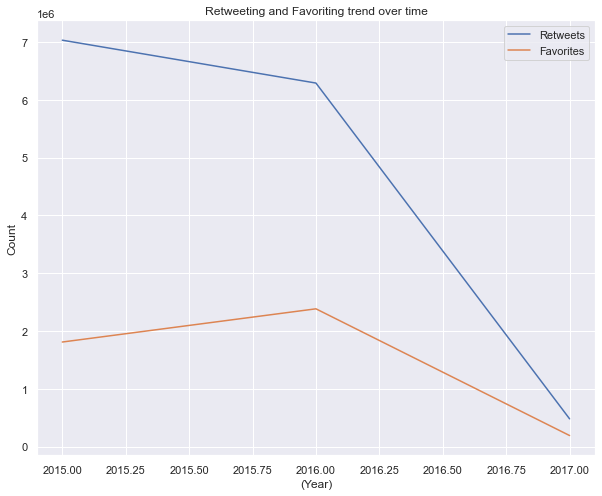

In [51]:
years = df_clean.timestamp.dt.year
ret_fav = df_clean.pivot_table(index=years, values=['favorite_count','retweet_count'], aggfunc='sum')
ret_fav
ret_fav.groupby(years).plot(kind='line')
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

###  Regarding to activity overtime, we can cleary notice a drop from 2016 to 2017 with a diference of 42,09 % in `"favorite_count"`, and  a drop from 2016 to 2017 with a diference of 49,96 % in `"retweet_count"`.


## Question 2: Which breed of dogs got the highest  favorite counts?

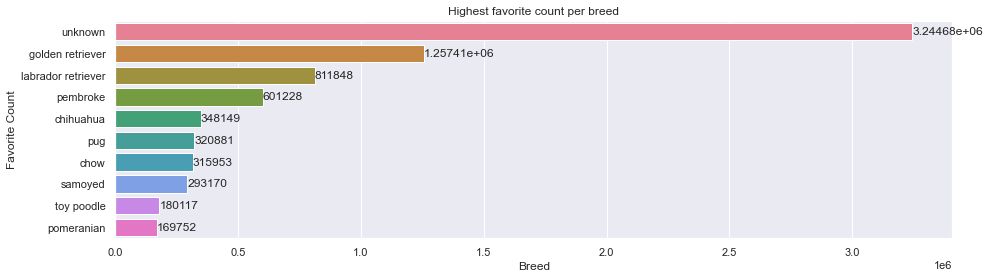

In [52]:
color = (sns.color_palette("husl", 10))
sns.set(rc={'figure.figsize': (15, 4)})
sns.set(font_scale=1)
pivot_breed= df_clean.pivot_table(index=['breed'], values=['favorite_count'], aggfunc='sum').sort_values(by="favorite_count",ascending=False)

ax = sns.barplot(x='favorite_count', y=pivot_breed.index, data=pivot_breed, palette=color,order=df_clean.breed.value_counts().iloc[:10].index, )
plt.title('Highest favorite count per breed')
plt.ylabel('Favorite Count')
plt.xlabel('Breed')
plt.savefig('breed')
for i in ax.containers:
    ax.bar_label(i,)
    pd.set_option('float_format', '{:f}'.format)

In [53]:
pivot_stage

NameError: name 'pivot_stage' is not defined

###   We can observe that "golden retriever" breed  with 1,257,407 likes, in second place we have the Labrador Retriever with 811848 likes and in the third place the "pembroke" with 601228. 

## Question 3: Which stage of dogs got the highest favorite counts?¶ 

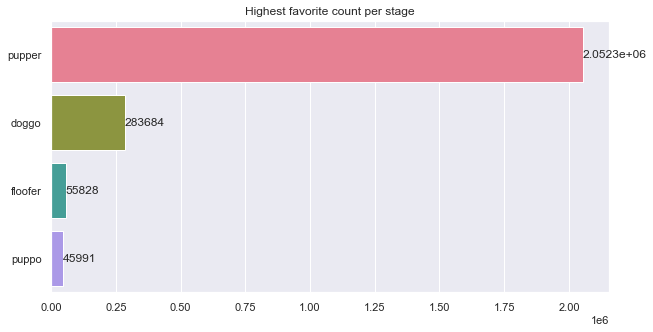

In [55]:
pivot_stage = df_clean.pivot_table(index=['stage'], values=['favorite_count'], aggfunc='sum')
pivot_stage
color = (sns.color_palette("husl", 4))
sns.set(rc={'figure.figsize': (10, 5)})
sns.set(font_scale=1)
#f = df_clean.sort_values(by='favorite_count', ascending=False)
ax = sns.barplot(y=pivot_stage.index,
                 x='favorite_count',
                 data=pivot_stage,
                 palette=color,
                 order=["pupper","doggo", "floofer",  "puppo"],
                 ci=None)
plt.title('Highest favorite count per stage')
plt.ylabel('')
plt.xlabel('')
plt.savefig('stages')
for i in ax.containers:
    ax.bar_label(i,)

### Cleary the most common stage is `"pupper"` with a total of 2,052,302 of favorites, representing 84,19 % of all stages, excluding "nones".

In [ ]:
#Showing Top Breed image
top_breed = df_clean[df_clean["breed"]=="golden retriever"]
url = top_breed.jpg_url.iloc[50]
response = requests.get(url)
Image.open(BytesIO(response.content))

In [1]:
import string

def substrings_in_string(big_string, substrings):
    matches = []
    for substring in substrings:
        if string.find(big_string, substring) != -1:
            matches.append(substring)
    if len(matches) == 0:
        print(big_string)
        return None
    else:
        return matches
